In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Check for missing values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
#Check for duplicate values

duplicates= df.duplicated().sum()

In [7]:
duplicates

0

In [8]:
#Correlation matrix to identify features

corre_matrix= df.corr()
corre_matrix

C:\Users\asus\AppData\Local\Temp\ipykernel_10584\7825587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre_matrix= df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


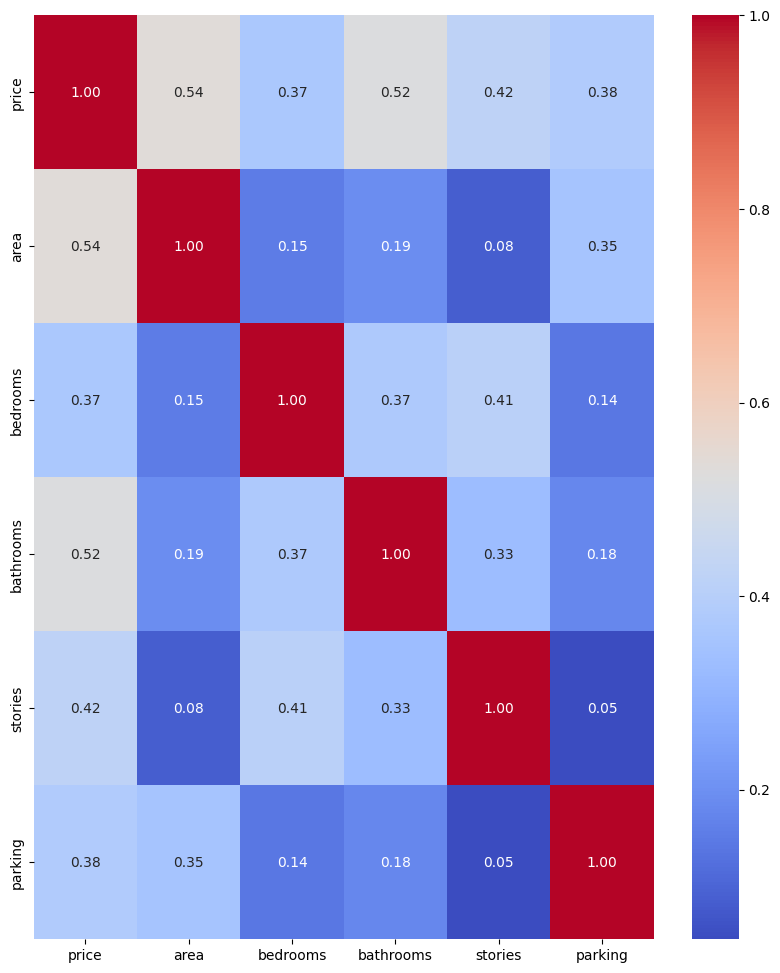

In [9]:
import seaborn as sns

plt.figure(figsize=(10,12))
sns.heatmap(corre_matrix,annot=True,fmt='.2f', cmap='coolwarm')
plt.show()

In [10]:
target_variable= 'parking'
features= corre_matrix[target_variable].abs().sort_values(ascending=False)
features

parking      1.000000
price        0.384394
area         0.352980
bathrooms    0.177496
bedrooms     0.139270
stories      0.045547
Name: parking, dtype: float64

In [13]:
top_5features= features.index[1:6]
top_5features

Index(['price', 'area', 'bathrooms', 'bedrooms', 'stories'], dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
#For training
x=df[top_5features]
y=df[target_variable]

In [20]:
#Spliiting the training and testing sets 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.5, random_state= 45)

In [21]:
#Creating LR Model

model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error

#Test set prediction
y_pred= model.predict(x_test)

#Evaluating by Mean Squared Error
mse= mean_squared_error(y_test, y_pred)

In [25]:
mse

0.6544821257114177

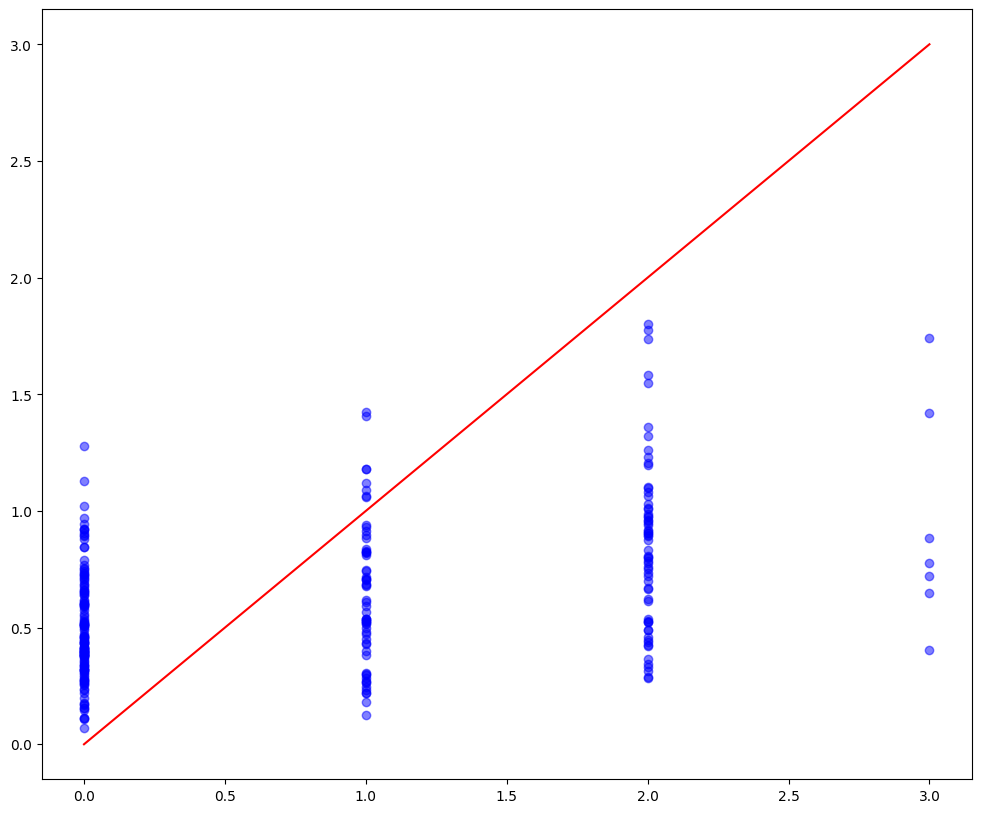

In [30]:
# Visualisations
#Scatter plot for predicted value and actual value

import seaborn as sns
plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

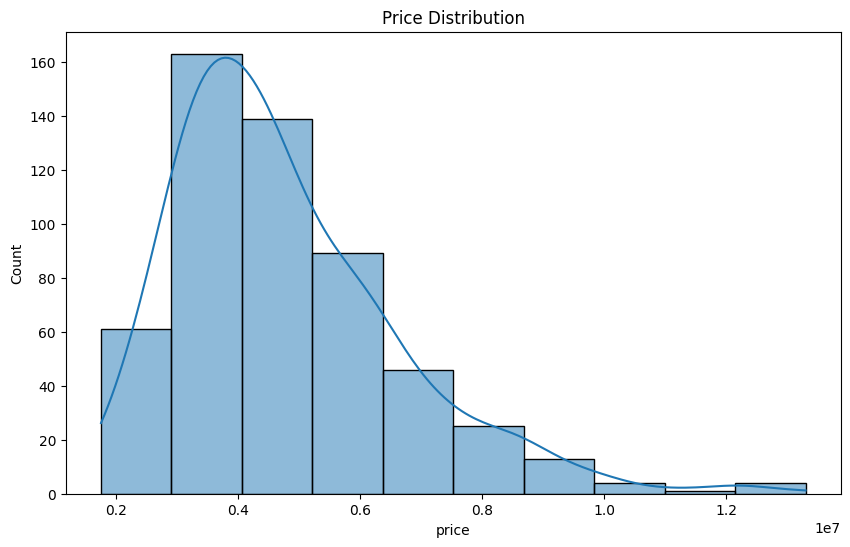

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title("Price Distribution")
plt.show()

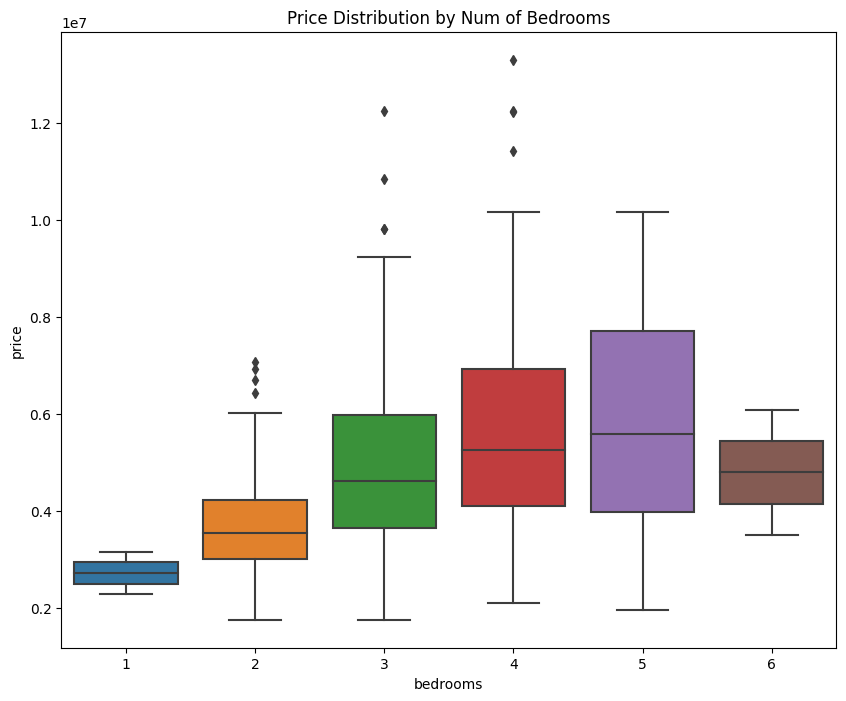

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='bedrooms',y='price')
plt.title('Price Distribution by Num of Bedrooms')
plt.show()